In [4]:
from bs4 import BeautifulSoup
import urllib
import csv
import re
import numpy as np
import pandas as pd

In [5]:
from selenium import webdriver 
from selenium.webdriver.common.by import By 
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC 
from selenium.common.exceptions import TimeoutException
option = webdriver.ChromeOptions()
option.add_argument("--incognito")
driver = webdriver.Chrome(executable_path='chromedriver.exe',options=option)

In [ ]:
import time
driver.get("https://www.greataupair.com/find-childcare-jobs/")
time.sleep(2)
#per page 45 content selection
driver.find_element_by_xpath('//html/body/div[3]/div/div[1]/div/div[2]/div[3]/div[1]/div[3]/select/option[5]').click()
time.sleep(2)
#clicking ! month filter
driver.find_element_by_xpath('//html/body/div[3]/div/div[1]/div/div[1]/form/div[1]/div/div[3]/select[1]/option[5]').click()
time.sleep(4)
page_source = driver.page_source
soup = BeautifulSoup(page_source, "lxml")
text = soup.find('div', {'class':'resultsNumbers'}).text
n = int(int(text.split()[2].replace(",",""))/(45*5))
page_sources = []
page_sources.append(driver.page_source)
time.sleep(4)
for x in range(n):
    more_buttons = driver.find_element_by_xpath('/html/body/div[3]/div/div[1]/div/div[2]/div[3]/div[1]/table/tbody/tr/td[3]/a').click()
    time.sleep(4)
    page_sources.append(driver.page_source)
    more_buttons = driver.find_element_by_xpath('/html/body/div[3]/div/div[1]/div/div[2]/div[3]/div[1]/table/tbody/tr/td[4]/a').click()
    time.sleep(4)
    page_sources.append(driver.page_source)
    more_buttons = driver.find_element_by_xpath('/html/body/div[3]/div/div[1]/div/div[2]/div[3]/div[1]/table/tbody/tr/td[5]/a').click()
    time.sleep(4)
    page_sources.append(driver.page_source)
    more_buttons = driver.find_element_by_xpath('/html/body/div[3]/div/div[1]/div/div[2]/div[3]/div[1]/table/tbody/tr/td[6]/a').click()
    time.sleep(4)
    page_sources.append(driver.page_source) 
    more_buttons = driver.find_element_by_xpath('/html/body/div[3]/div/div[1]/div/div[2]/div[3]/div[1]/table/tbody/tr/td[7]/a').click()
    time.sleep(4)
    page_sources.append(driver.page_source)

In [7]:
def innerHTML(element):
    return element.decode_contents(formatter="html")

def get_name(body):
    c = body.find('a', {'class':'name-txt'})
    if c:
        return c.text.strip()
    else :
        return "NA"

def get_headline(body):
    c = body.find('a', {'class':'headline'})
    if c:
        return c.text.strip()
    else :
        return "NA"

def get_location(body):
    c = body.find('div', {'class':'searchResultInfo'})
    if c:
        return c.find_all('p')[0].text.strip()
    else :
        return "NA"

def get_salary(body):
    
    c = body.find('div', {'class':'searchResultInfo'})
    if c:
        return c.find_all('p')[1].text.strip()
    else :
        return "NA"
    
def get_work_hour(body):
    
    c = body.find('div', {'class':'searchResultInfo'})
    if c:
        return c.find_all('p')[2].text.strip()
    else :
        return "NA"
    
def get_exp(body):
    
    c = body.find('div', {'class':'searchResultInfo'})
    if c:
        return c.find_all('p')[3].text.strip()
    else :
        return "NA"
    
def get_last_login(body):

    c = body.find('div', {'class':'searchResultMetadata clearfix'})
    if c:
        return c.find_all('p')[0].text.strip()
    else :
        return "NA"

def get_availability(body):

    c = body.find('div', {'class':'searchResultMetadata clearfix'})
    if c:
        return c.find_all('p')[1].text.strip()
    else :
        return "NA"

def get_job_type(body):

    c = body.find('div', {'class':'searchResultMetadata clearfix'})
    if c:
        return c.find_all('p')[3].text.strip()
    else :
        return "NA"

def get_decription(body):
    c =body.find('p', {'class':'introLetter'})
    if c:
        return c.text.strip()
    else :
        return "NA"    

def get_link(body):
    c =body.find('p', {'class':'introLetter'}).a
    if c:
        return c.get('href')
    else :
        return "NA"    
    

In [8]:
from bs4 import BeautifulSoup
import requests
scraped_data = []
for i in range(len(page_sources)):
    soup = BeautifulSoup(page_sources[i], "lxml")
    services = soup.find_all('div', {'class':'searchResultContent'})
    for service_html in services:
        dict_service = {}
        name = get_name(service_html)
        headline = get_headline(service_html)
        location = get_location(service_html)
        salary = get_salary(service_html)
        work_hour = get_work_hour(service_html)
        experience  = get_exp(service_html)
        last_login    = get_last_login(service_html)
        availability    = get_availability(service_html)
        job_type = get_job_type(service_html)
        description =get_decription(service_html)
        link = get_link(service_html)
        dict_service['Name'] = name
        dict_service['headline'] = headline
        dict_service['location'] = location
        dict_service['salary'] = salary
        dict_service['work_hour'] = work_hour
        dict_service['experience'] = experience
        dict_service['last_login'] = last_login
        dict_service['availability'] = availability
        dict_service['job_type'] = job_type
        dict_service['description'] = description
        dict_service['link'] = 'https://www.greataupair.com'+ link
        scraped_data.append(dict_service)
dataFrame = pd.DataFrame.from_dict(scraped_data)

In [10]:
dataFrame.head(3)

,Name,headline,location,salary,work_hour,experience,last_login,availability,job_type,description,link
0,Suley D.,"Housekeeper, Butler,Nurse/Carer","Coral Gables, FL",Negotiable,As Needed,1 yr exp required,Last logged in\nToday,Available Jul 20 - Jul 20,"Job is Full Time, Live-in or Live-out",Housekeeper to work in our house in Miami Flor...,https://www.greataupair.com/housekeeper_job/Am...
1,Aster L.,Live-Out nanny in Ghent,"Gent, Belgium",Negotiable,30 hrs/week,3 yrs exp required,Last logged in\nToday,Available Aug 20 - Sep 20 for 6-48mo,"Job is Part Time, Live-out","We are a warm, flexible and busy family with t...",https://www.greataupair.com/nanny_job/Belgium-...
2,Tina G.,"Helping with children, cooking and housekeeping","Los Altos, CA",Negotiable,35 hrs/week,1 yr exp required,Last logged in\nToday,Available Jul 20 - Aug 20,"Job is Full Time, Live-in","We need help with children, cooking and housek...",https://www.greataupair.com/housekeeper_job/Am...


## For saving the dataframe uncomment the next cell

In [35]:
# dataFrame.to_csv('au_month.csv', index=False)
df = pd.read_csv('au_month.csv', engine='python')

In [36]:
df.shape

(2427, 13)

In [37]:
new = df['location'].str.split(",", n = 1, expand = True)
df['location_city'] = new[0]
df['location_country'] = new[1]
df['location_country'] = df['location_country'].str.replace(' ','')
df2 = df[df['location_country'] == 'India']

In [38]:
df2.shape

(56, 13)

In [39]:
df1 = df2.drop(['description','link','location'],axis=1)

In [40]:
df1['last_login'] = df1['last_login'].str.replace('Last logged in\n','')
df1['last_login'] = df1['last_login'].str.replace('Today','0')
df1['last_login'] = df1['last_login'].str.replace('days ago','')
df1['last_login'] = df1['last_login'].str.replace('Yesterday','1')
df1['last_login'] = df1['last_login'].str.replace(' ','')

In [41]:
df1['job_type'] = df1['job_type'].str.replace('Job is ','')

In [42]:
df1['last_login'] = df1['last_login'].astype(int)
df1 = df1.reset_index(drop = True)

 ##  For saving the dataframe of Indian Response only uncomment the next cell

In [43]:
# df1.to_csv('au_month_india.csv')

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('classic')
plt.figure(figsize=(15,15))

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

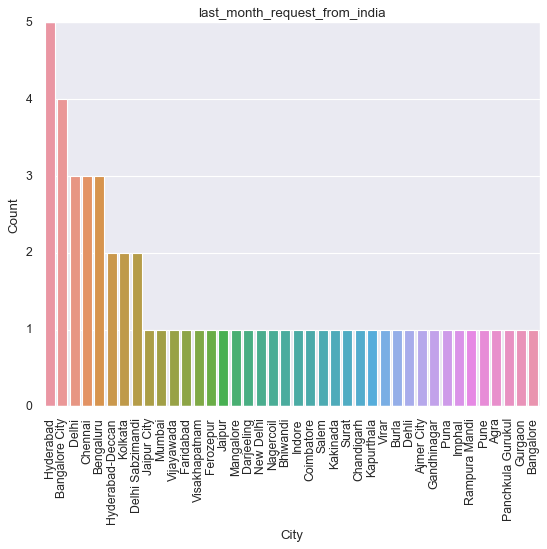

In [73]:
city_count  = df1['location_city'].value_counts()

sns.set(font_scale=1)

sns_plot = sns.barplot(x = city_count.index,y = city_count.values)
plt.xticks(rotation=90)
plt.xlabel("City")
plt.ylabel("Count")
plt.title("last_month_request_from_india")
plt.show()
fig = sns_plot.get_figure()
fig.savefig("last_month_request_from_india.png")

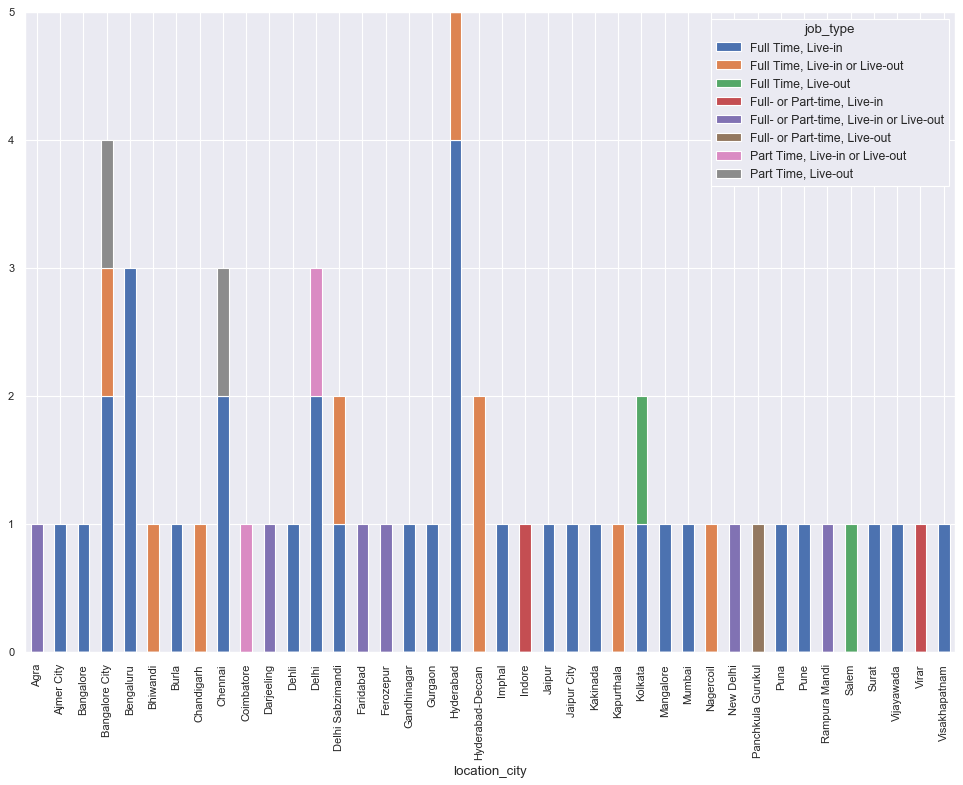

In [76]:
df_plot_1 = df1.groupby(['job_type', 'location_city']).size().reset_index().pivot(columns='job_type', index='location_city', values=0)
plot  =df_plot_1.plot.bar(figsize=(15,10), fontsize = 10,stacked=True,rot =90,grid = "minor")

In [77]:
plot.get_figure().savefig('location grouped by job_type.png')

In [78]:
df1['headline'] = df1['headline'].str.lower()

In [79]:
personal_assistant = ['assistant' , 'secretary','manager','files','computer']
helper = ['maid','helper','housekeeper','household','homemaker','house','help','work']
nanny = ['care' ,'caretaker','nanny','babysitter','baby']
doctor = ['doctor']
driver = ['driver','driving']

In [80]:
df= df1['headline']

In [81]:
for i in range(len(df)):
    a = re.sub("[! #$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]", " ", df[i])
    df[i] = a

C:\Users\91727\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [82]:
df1['headline'] = df

In [83]:
for index, row in df1.iterrows():
    for x in row['headline'].split():
        if x in personal_assistant:
            df1.loc[index,'category'] = "personal_assistant"
        if x in nanny:
            df1.loc[index,'category'] = "nanny"
        if x in helper:
            df1.loc[index,'category'] = "helper"
        if x in doctor:
            df1.loc[index,'category'] = "doctor"
        if x in driver:
            df1.loc[index,'category'] = "driver"

In [84]:
df1.head(2)

,Name,headline,salary,work_hour,experience,last_login,availability,job_type,location_city,location_country,category
0,Lata M.,no,$501-$1000\n/week,45 hrs/week,No exp required,0,Available Jun 20 - Jun 20,"Full Time, Live-in or Live-out",Hyderabad-Deccan,India,NaN
1,Jyotsna F.,looking for a living in nanny and household help,Negotiable,As Needed,No exp required,0,Available May 20 - May 20 for 6-48mo,"Full Time, Live-in",Bengaluru,India,helper


In [85]:
df1['category'].value_counts()

nanny                 27
helper                15
personal_assistant     4
doctor                 1
Name: category, dtype: int64

In [86]:
df1['job_type'].value_counts()

Full Time, Live-in                         32
Full Time, Live-in or Live-out              9
Full- or Part-time, Live-in or Live-out     6
Part Time, Live-out                         2
Part Time, Live-in or Live-out              2
Full Time, Live-out                         2
Full- or Part-time, Live-in                 2
Full- or Part-time, Live-out                1
Name: job_type, dtype: int64

In [87]:
df_plot = df1.groupby(['job_type', 'category']).size().reset_index().pivot(columns='job_type', index='category', values=0)

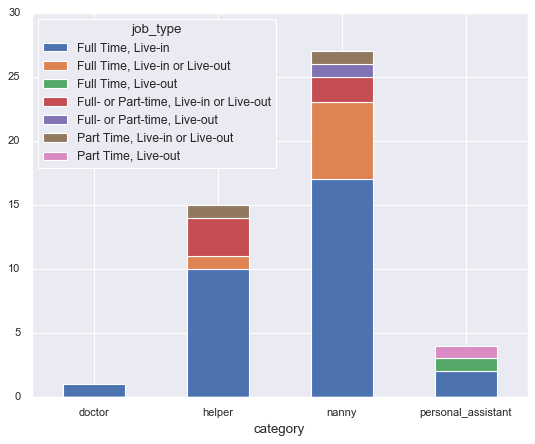

In [89]:
plot_2 = df_plot.plot.bar(fontsize = 10,stacked=True,rot =0, grid = "both" )

In [90]:
plot_2.get_figure().savefig('category_plot_grouped_by_job_type.png')